# Ajuste de una cónica para los inversos en la temperatura crítico como función del exponente de interacción

In [1]:
import sys
sys.path.append('C:\\Users\\MHJGuillermo\\PycharmProjects\\Doctorado\\Ising\\Varios_vecinos\\venv\\src')

In [2]:
%pylab inline

from pathlib import Path

import h5py
import numpy as np
import style
from ising.io import read_ising_config
from matplotlib import pyplot, rcParams
from matplotlib.axes import Axes, GridSpec
from matplotlib.figure import Figure
from ruamel.yaml import YAML
from scipy import interpolate as interp
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
import pandas as pd
import json

import os
import re

yaml = YAML()

Populating the interactive namespace from numpy and matplotlib


### Model

In [3]:
def model_function(x: float,a1: float,a2: float,a3: float,a4: float,a5: float):
    return a1*np.sqrt(x**2+a2*x + a3) + a4*x + a5

In [4]:
def get_extrapol_function(model_function,a1,a2,a3,a4,a5):
    def extrapol_funct(x):
        return model_function(x,a1,a2,a3,a4,a5)
    return extrapol_funct

### individual file

In [5]:
alpha = 1.0
data_path = Path("../../../data/alpha_{}".format(alpha)).resolve()
file = 'alpha-{}_max_cv.csv'.format(alpha)
df = pd.read_csv(os.path.join(data_path,file),index_col=0)

In [6]:
df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20
max_Cv,0.439229,0.550635,0.645502,0.722298,0.786218,0.840760,0.888195,0.930064,0.967459,1.001175,1.031816,1.059851,1.085648,1.109505,1.131664,1.222995
temp_at_max_Cv,0.833557,1.508930,1.978686,2.349033,2.660904,2.931842,3.173542,3.389839,3.589155,3.772838,3.942843,4.101124,4.249634,4.390327,4.523693,5.097215
inv_temp_at_max_Cv,1.199680,0.662721,0.505386,0.425707,0.375812,0.341083,0.315105,0.294999,0.278617,0.265052,0.253624,0.243836,0.235314,0.227773,0.221058,0.196186


In [7]:
#df.drop(columns=["1"],inplace=True)

In [8]:
nvs = df.columns.values.astype(np.float)
x_data = 1/nvs
y_data = 1/df.loc['temp_at_max_Cv'].values
#x_data = np.insert(x_data,0,0)
#y_data = np.insert(y_data,0,0)

In [9]:
print(x_data)
print(y_data)

[1.         0.5        0.33333333 0.25       0.2        0.16666667
 0.14285714 0.125      0.11111111 0.1        0.09090909 0.08333333
 0.07692308 0.07142857 0.06666667 0.05      ]
[1.19967801 0.6627212  0.50538593 0.42570714 0.37581216 0.34108253
 0.31510535 0.29499928 0.27861712 0.26505244 0.25362409 0.24383562
 0.2353144  0.22777345 0.22105832 0.19618555]


In [10]:
(a1,a2,a3,a4,a5), _= curve_fit(f=model_function,xdata=x_data,ydata=y_data,maxfev=1000)

C:\Users\MHJGuillermo\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


In [11]:
print("a1: {}\na2: {}\na3: {}\na4: {}\na5: {}".format(a1,a2,a3,a4,a5))

a1: 0.011814521347846997
a2: -1.2957871393903393
a3: 0.3978936230205729
a4: 1.0434440663922637
a5: 0.15264476172286767


In [12]:
extrapol_funct = get_extrapol_function(model_function, a1, a2, a3, a4, a5)

C:\Users\MHJGuillermo\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


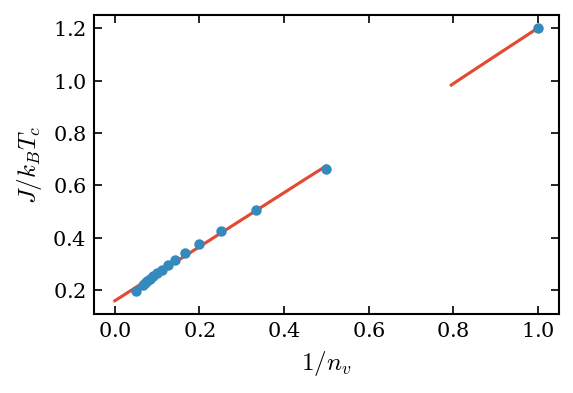

model_funt = 0.012*sqrt((x+-1.296)^2+0.398)+1.043*x + 0.153
Extrapolation:
0.16009722115806707 at 1/nv=0
1.1998640526902666 at 1/nv=1
min:0.16009722115806707 at 0.0


In [13]:
# define the point for graph
x_extrapol = np.linspace(0, 1, 2048)
y_extrapol = extrapol_funct(x_extrapol)

# Load the default style.
style.use("default")
rcParams["text.usetex"] = False

fig1: Figure = pyplot.figure(figsize=(4, 9), dpi=150)
grid_spec = GridSpec(3, 1)

# Specific heat subplot.
ax: Axes = fig1.add_subplot(grid_spec[0, 0])

ax.plot(x_extrapol, y_extrapol, lw=1.5)
ax.plot(x_data, y_data, marker="o", lw=0)

ax.set_xlabel(r"$1/n_v$")
ax.set_ylabel(r"$J/k_BT_c$")

pyplot.draw()
pyplot.show()
print("model_funt = {:.3f}*sqrt((x+{:.3f})^2+{:.3f})+{:.3f}*x + {:.3f}".format(a1,a2,a3,a4,a5))
print("Extrapolation:\n{} at 1/nv=0\n{} at 1/nv=1".format(extrapol_funct(0),extrapol_funct(1)))
print("min:{} at {}".format(np.nanmin(y_extrapol),x_extrapol[np.nanargmin(y_extrapol)]))


### Adjust for Miguel Angel

In [91]:
funct_ma = get_extrapol_function(model_function, 0.895, 0.2021, -0.0408, 0.058)

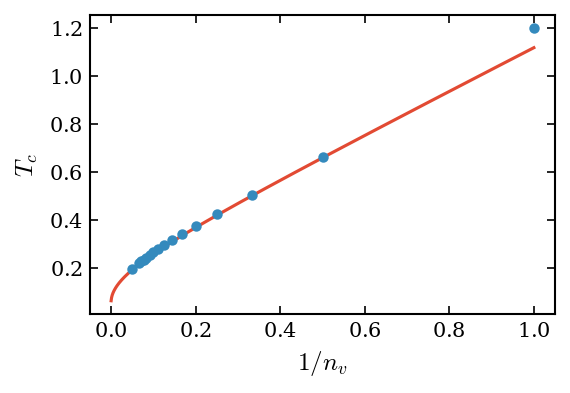

Extrapolation:
0.06396435413519316 at 1/nv=0
1.1185823299113795 at 1/nv=1
min:0.06396435413519316 at 0.0


In [92]:
# define the point for graph
x_extrapol = np.linspace(0, 1, 2048)
y_extrapol = funct_ma(x_extrapol)

# Load the default style.
style.use("default")
rcParams["text.usetex"] = False

fig1: Figure = pyplot.figure(figsize=(4, 9), dpi=150)
grid_spec = GridSpec(3, 1)

# Specific heat subplot.
ax: Axes = fig1.add_subplot(grid_spec[0, 0])

ax.plot(x_extrapol, y_extrapol, lw=1.5)
ax.plot(x_data, y_data, marker="o", lw=0)

ax.set_xlabel(r"$1/n_v$")
ax.set_ylabel(r"$T_c$")

pyplot.draw()
pyplot.show()
print("Extrapolation:\n{} at 1/nv=0\n{} at 1/nv=1".format(funct_ma(0),funct_ma(1)))
print("min:{} at {}".format(np.nanmin(y_extrapol),x_extrapol[np.nanargmin(y_extrapol)]))


### General file all Tc

In [14]:
data_path = Path("../../../data/").resolve()
file = 'All_Tc.csv'
df_all_tc = pd.read_csv(os.path.join(data_path,file))

In [18]:
df_all_tc

,nv,P0.5,P1.0,P1.1,P1.2,P1.3,P1.4,P1.5,P1.6,P1.7,P1.8,P1.9,P2.0,P2.5,P4,P5,Incert
0,2,1.650080,1.508930,1.469946,1.428265,1.394645,1.360791,1.330271,1.298417,1.271128,1.244646,1.218500,1.196846,1.095501,0.945082,0.82504,NaN
1,3,2.522788,1.978686,1.892921,1.830096,1.740525,1.674612,1.613994,1.555711,1.503083,1.455246,1.409521,1.364751,1.214908,0.945082,0.82504,NaN
2,4,3.240916,2.349033,2.218437,2.114914,1.994955,1.892921,1.800771,1.723341,1.649272,1.583917,1.522574,1.469201,1.248587,0.945082,0.82504,NaN
3,5,3.989909,2.660904,2.485476,2.325746,2.189679,2.060552,1.950210,1.846141,1.754529,1.669945,1.596644,1.530485,1.275186,0.945082,0.82504,NaN
4,6,4.559498,2.931842,2.713532,2.520381,2.354489,2.196996,2.055190,1.939702,1.832496,1.739543,1.651221,1.576001,1.293508,0.945082,0.82504,NaN
5,7,5.159640,3.173542,2.914299,2.685063,2.489525,2.310049,2.159736,2.017670,1.894871,1.785192,1.692154,1.605684,1.305456,0.945082,0.82504,NaN
6,8,NaN,3.389839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,9,NaN,3.589155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,10,NaN,3.772838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,11,NaN,3.942843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df_params_conicas = pd.DataFrame(index=["a1","a2","a3","a4","a5"])
df_extrapol_val = pd.DataFrame(index=["infty","1"])

C:\Users\MHJGuillermo\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\MHJGuillermo\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


Save graph C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\Varios_vecinos\venv\graphs\Inv_Tc_vs_inv_nv_extrapol_P1.0.png


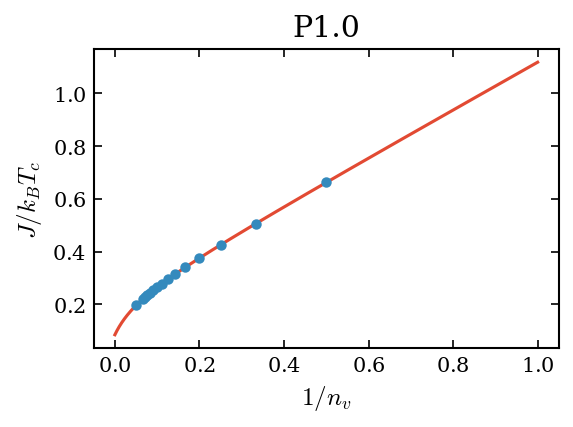

model_funt = 133.596*sqrt((x+0.118)^2+0.003)+-132.697*x+-7.667
Extrapolation:
0.08466052838630489 at 1/nv=0
1.118661282014334 at 1/nv=1
min:0.08466052838630489 at 0.0


Save graph C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\Varios_vecinos\venv\graphs\Inv_Tc_vs_inv_nv_extrapol_P1.1.png


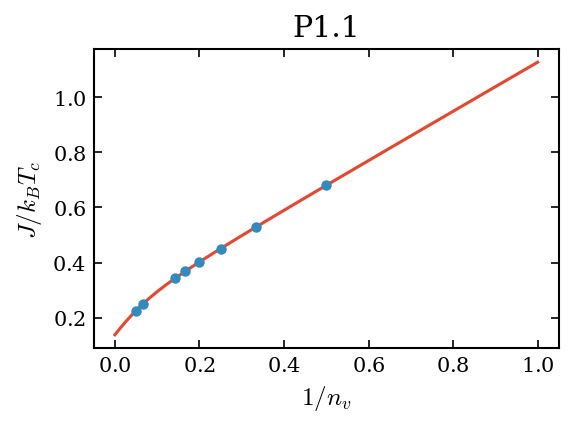

model_funt = -0.777*sqrt((x+-0.072)^2+0.010)+1.663*x+0.216
Extrapolation:
0.1379590421270182 at 1/nv=0
1.1271727570296126 at 1/nv=1
min:0.1379590421270182 at 0.0


Save graph C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\Varios_vecinos\venv\graphs\Inv_Tc_vs_inv_nv_extrapol_P1.2.png


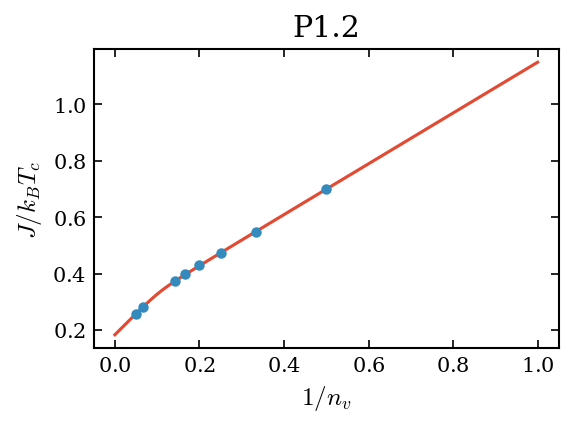

model_funt = -0.313*sqrt((x+-0.207)^2+0.012)+1.213*x+0.217
Extrapolation:
0.18278200758557883 at 1/nv=0
1.1495285890400482 at 1/nv=1
min:0.18278200758557883 at 0.0


Save graph C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\Varios_vecinos\venv\graphs\Inv_Tc_vs_inv_nv_extrapol_P1.3.png


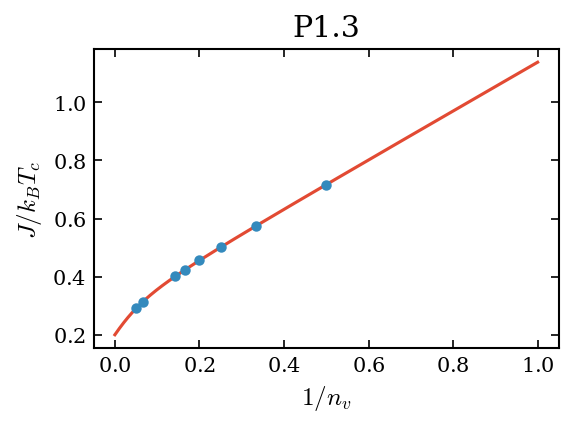

model_funt = -1.002*sqrt((x+-0.045)^2+0.007)+1.836*x+0.284
Extrapolation:
0.201031414718445 at 1/nv=0
1.1375662041880532 at 1/nv=1
min:0.201031414718445 at 0.0


Save graph C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\Varios_vecinos\venv\graphs\Inv_Tc_vs_inv_nv_extrapol_P1.4.png


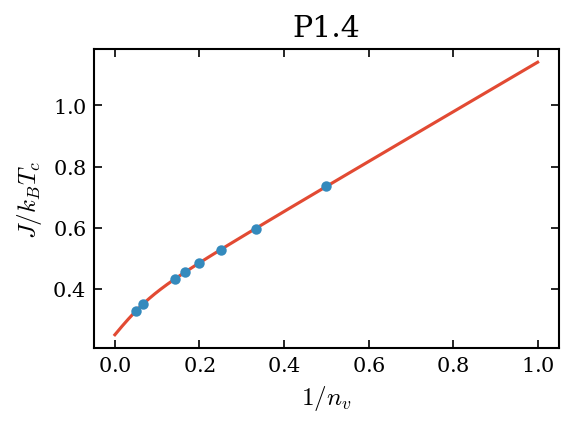

model_funt = -0.543*sqrt((x+-0.116)^2+0.009)+1.353*x+0.302
Extrapolation:
0.2497471098712123 at 1/nv=0
1.1412514023576188 at 1/nv=1
min:0.2497471098712123 at 0.0


Save graph C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\Varios_vecinos\venv\graphs\Inv_Tc_vs_inv_nv_extrapol_P1.5.png


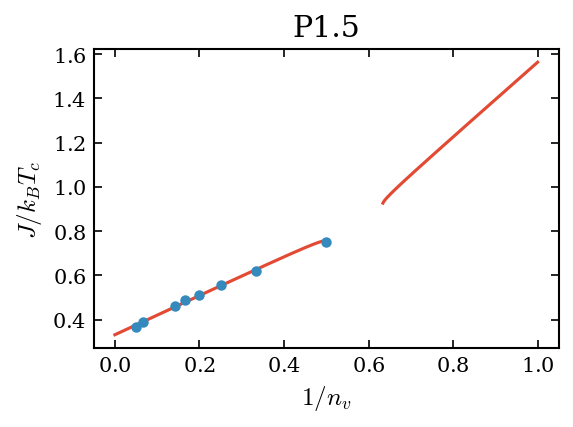

model_funt = 0.395*sqrt((x+-1.134)^2+0.317)+1.286*x+0.109
Extrapolation:
0.3314048257351243 at 1/nv=0
1.563941425682682 at 1/nv=1
min:0.3314048257351243 at 0.0


Save graph C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\Varios_vecinos\venv\graphs\Inv_Tc_vs_inv_nv_extrapol_P1.6.png


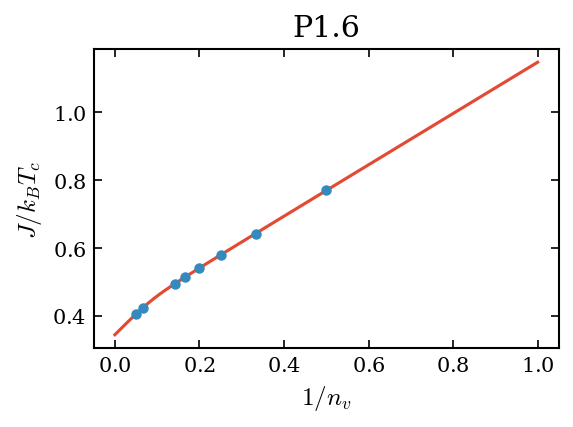

model_funt = -0.270*sqrt((x+-0.165)^2+0.009)+1.025*x+0.371
Extrapolation:
0.34480957992859007 at 1/nv=0
1.1478823092803552 at 1/nv=1
min:0.34480957992859007 at 0.0


Save graph C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\Varios_vecinos\venv\graphs\Inv_Tc_vs_inv_nv_extrapol_P1.7.png


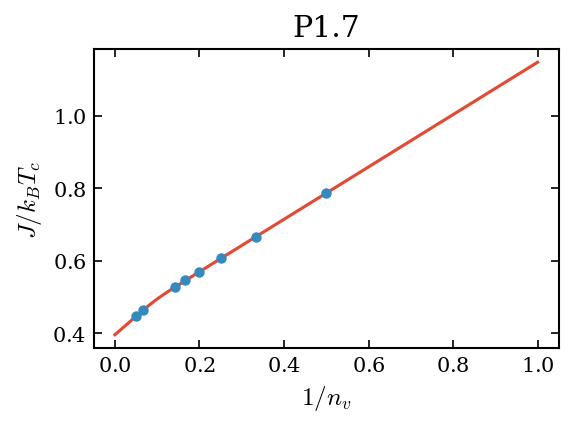

model_funt = -0.153*sqrt((x+-0.191)^2+0.010)+0.874*x+0.411
Extrapolation:
0.3962388779575987 at 1/nv=0
1.1469549436518929 at 1/nv=1
min:0.3962388779575987 at 0.0


Save graph C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\Varios_vecinos\venv\graphs\Inv_Tc_vs_inv_nv_extrapol_P1.8.png


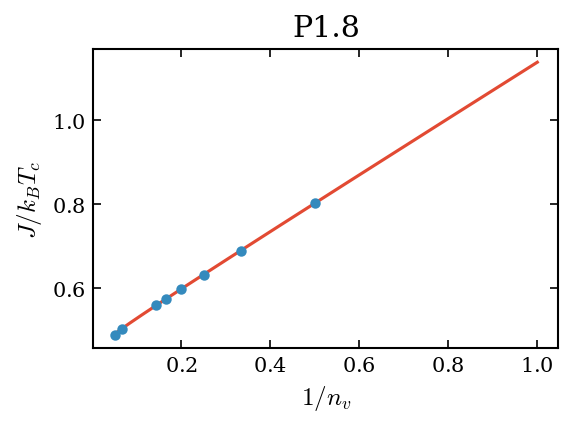

model_funt = 0.012*sqrt((x+5.860)^2+-0.295)+0.651*x+0.456
Extrapolation:
nan at 1/nv=0
1.1379033004755963 at 1/nv=1
min:0.4896326403637906 at 0.05031753786028334


Save graph C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\Varios_vecinos\venv\graphs\Inv_Tc_vs_inv_nv_extrapol_P1.9.png


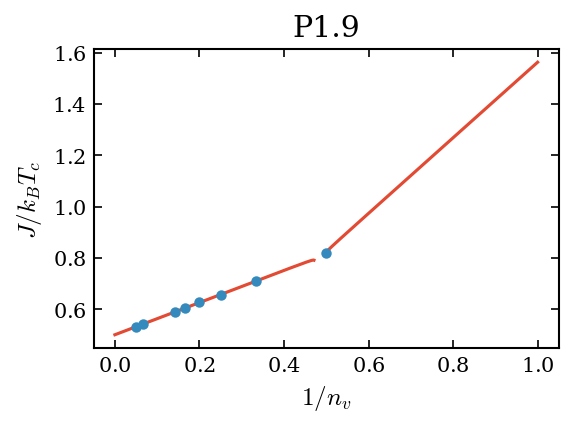

model_funt = 0.422*sqrt((x+-0.971)^2+0.236)+1.050*x+0.296
Extrapolation:
0.5005021174098665 at 1/nv=0
1.5628164060075145 at 1/nv=1
min:0.5005021174098665 at 0.0


Save graph C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\Varios_vecinos\venv\graphs\Inv_Tc_vs_inv_nv_extrapol_P2.0.png


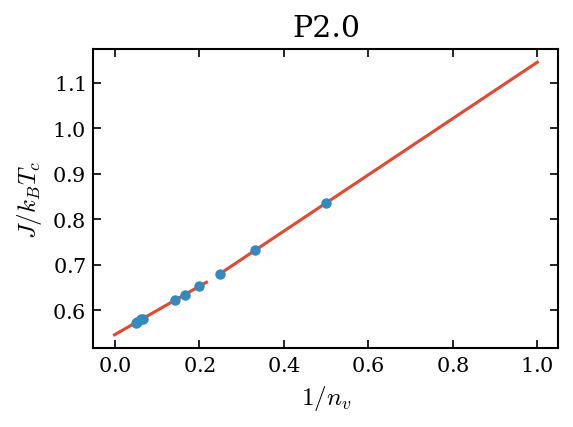

model_funt = 0.043*sqrt((x+-0.466)^2+0.054)+0.575*x+0.537
Extrapolation:
0.5467016473556033 at 1/nv=0
1.1445599515850509 at 1/nv=1
min:0.5467016473556033 at 0.0




In [23]:
COLUMNS = ["P1.0","P1.1","P1.2","P1.3","P1.4","P1.5","P1.6","P1.7","P1.8","P1.9","P2.0"]
path_save_graph = Path("../../graphs/").resolve()
for COLUMN in COLUMNS:
    file_graph = 'Inv_Tc_vs_inv_nv_extrapol_{}.png'.format(COLUMN)
    # Get the data in arrays
    df_part = df_all_tc[["nv",COLUMN]]
    df_part.dropna(inplace=True)
    x_data = 1/df_part['nv'].values
    y_data = 1/df_part[COLUMN].values

    # fit 
    (a1,a2,a3,a4,a5), _= curve_fit(f=model_function,xdata=x_data,ydata=y_data,maxfev=100000)
    df_params_conicas[COLUMN] = pd.Series([a1,a2,a3,a4,a5])
    extrapol_funct = get_extrapol_function(model_function, a1, a2, a3, a4,a5)

    # define the point for graph
    x_extrapol = np.linspace(0, 1, 2048)
    y_extrapol = extrapol_funct(x_extrapol)

    # Load the default style.
    style.use("default")
    rcParams["text.usetex"] = False

    fig1: Figure = pyplot.figure(figsize=(4, 9), dpi=150)
    grid_spec = GridSpec(3, 1)

    # Specific heat subplot.
    ax: Axes = fig1.add_subplot(grid_spec[0, 0])

    ax.plot(x_extrapol, y_extrapol, lw=1.5)
    ax.plot(x_data, y_data, marker="o", lw=0)

    ax.set_xlabel(r"$1/n_v$")
    ax.set_ylabel(r"$J/k_BT_c$")

    ax.set_title(COLUMN)
    pyplot.draw()
    print('Save graph {}'.format(os.path.join(path_save_graph,file_graph)))
    #pyplot.savefig(os.path.join(path_save_graph,file_graph))
    pyplot.show()
    print("model_funt = {:.3f}*sqrt((x+{:.3f})^2+{:.3f})+{:.3f}*x+{:.3f}".format(a1,a2,a3,a4,a5))
    print("Extrapolation:\n{} at 1/nv=0\n{} at 1/nv=1".format(extrapol_funct(0),extrapol_funct(1)))
    df_extrapol_val[COLUMN] = pd.Series([extrapol_funct(0),extrapol_funct(1)])  
    print("min:{} at {}".format(np.nanmin(y_extrapol),x_extrapol[np.nanargmin(y_extrapol)]))    
    print("\n")

In [17]:
print(df_params_conicas)
print("Exporting to csv files the params adjusted {}".format(os.path.join(data_path,'params_conical_curves.csv'.format(alpha))))
df_params_conicas.to_csv(os.path.join(data_path,'params_conical_curves.csv'.format(alpha)))
print(df_extrapol_val)
print("Exporting to csv files the extrapolation values adjusted {}".format(os.path.join(data_path,'extrapol_values.csv'.format(alpha))))
df_extrapol_val.to_csv(os.path.join(data_path,'extrapol_values.csv'.format(alpha)))


          P1.0        P1.1       P1.2        P1.3        P1.4       P1.5  \
a1  212.121074  183.720899  41.146405  167.981311  135.691820  89.067477   
a2    0.058858    0.050181   0.006520    0.036905    0.028669   0.028666   
a3   -0.000079   -0.000084  -0.000149   -0.000067   -0.000068  -0.000089   
a4 -211.222711 -182.849976 -40.272428 -167.156794 -134.897582 -88.307037   
a5  -12.256739   -8.960729  -0.000649   -5.884150   -3.544120  -2.174590   

         P1.6      P1.7      P1.8      P1.9      P2.0  
a1  53.982950 -0.153279 -0.057886  0.977246  0.043049  
a2   0.007435 -0.095474 -0.105164 -0.493566 -0.233177  
a3  -0.000071  0.000708 -0.001421 -0.000041 -0.000238  
a4 -53.240535  0.874229  0.742910  1.604877  0.574870  
a5   0.000866  0.411431  0.454034  0.018230  0.536686  
Exporting to csv files the params adjusted C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\Varios_vecinos\venv\data\params_conical_curves.csv
           P1.0      P1.1      P1.2      P1.3      P1.4    